In [90]:
import numpy as np
import pandas as pd

data = pd.read_csv('household_power_consumption.txt', delimiter = ';', low_memory = False)
data["Date"] = data['Date'] + ' ' + data['Time']
data.index = pd.to_datetime(data['Date'], format = '%d/%m/%Y %H:%M:%S')
data = data.drop(columns = ['Date', 'Time'])
data = data.replace('?', np.nan)
data = data.astype(float)

data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0


In [91]:
daily_data = data.resample("D").sum()
daily_data = daily_data[daily_data.columns[:-3]]

daily_data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity
Date,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8
2006-12-17,3390.460,226.006,345725.32,14398.6
2006-12-18,2203.826,161.792,347373.64,9247.2
2006-12-19,1666.194,150.942,348479.01,7094.0
2006-12-20,2225.748,160.998,348923.61,9313.0
...,...,...,...,...
2010-11-22,2041.536,142.354,345883.85,8660.4
2010-11-23,1577.536,137.450,346428.76,6731.2
2010-11-24,1796.248,132.460,345644.59,7559.4


In [92]:
daily_data['Day'] = [(date - date.replace(month = 1, day = 1)).days
                     for date in daily_data.index]
daily_data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Day
Date,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,349
2006-12-17,3390.460,226.006,345725.32,14398.6,350
2006-12-18,2203.826,161.792,347373.64,9247.2,351
2006-12-19,1666.194,150.942,348479.01,7094.0,352
2006-12-20,2225.748,160.998,348923.61,9313.0,353
...,...,...,...,...,...
2010-11-22,2041.536,142.354,345883.85,8660.4,325
2010-11-23,1577.536,137.450,346428.76,6731.2,326
2010-11-24,1796.248,132.460,345644.59,7559.4,327


In [93]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
final_data = pd.DataFrame(sc.fit_transform(daily_data), columns = daily_data.columns)

final_data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Day
0,-0.554478,-2.710524,-6.777867,-0.545561,1.615587
1,2.980353,0.965577,0.094258,3.057087,1.625150
2,1.057380,-0.269781,0.139178,1.043735,1.634713
3,0.186132,-0.478515,0.169301,0.202187,1.644276
4,1.092905,-0.285056,0.181417,1.069452,1.653839
...,...,...,...,...,...
1437,0.794384,-0.643732,0.098579,0.814392,1.386075
1438,0.042460,-0.738076,0.113428,0.060391,1.395638
1439,0.396888,-0.834075,0.092058,0.384082,1.405201
1440,-0.194740,-1.148272,0.151130,-0.223824,1.414764


In [94]:
def get_inputs(data: pd.DataFrame,
               window: int) -> tuple:
    x = list()
    y = list()
    size = len(data)
    for i in range(size-window-1):
        j = i+window
        xi = data.iloc[i:j]
        xi = xi.to_numpy()
        yi = data.iloc[j]
        yi = yi.to_numpy()
        yi = yi.flatten()
        x.append(xi)
        y.append(yi)
    return x, y

X,Y = get_inputs(final_data, 3)

In [95]:
from sklearn.model_selection import train_test_split

x_train = np.array(
X[:1145]
)

x_test = np.array(
X[1145:]
)

y_train = np.array(
Y[:1145]
)

y_test = np.array(
Y[1145:]
)

print(x_train.shape)
print(y_train.shape)

(1145, 3, 5)
(1145, 5)


# LSTM

In [96]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import Embedding, Dense, LSTM,Input
from tensorflow.keras.losses import MSE
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Model configuration
additional_metrics = ['mae']
batch_size = 128
number_of_epochs = 5
optimizer = Adam()
validation_split = 0.20
verbosity_mode = 1
model = Sequential()
model.add(LSTM(64, return_sequences = True, input_shape = (3,5)))
model.add(LSTM(32))
model.add(Dense(5))
model.compile(optimizer="adam", loss="mse", metrics=additional_metrics)
model.build()
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_17 (LSTM)              (None, 3, 64)             17920     
                                                                 
 lstm_18 (LSTM)              (None, 32)                12416     
                                                                 
 dense_11 (Dense)            (None, 5)                 165       
                                                                 
Total params: 30,501
Trainable params: 30,501
Non-trainable params: 0
_________________________________________________________________


In [97]:
history = model.fit(
    x_train,
    y_train,
    epochs=1000,
    verbose=1
)

Epoch 1/1000
36/36 [==============================] - 3s 4ms/step - loss: 0.7929 - mae: 0.6160
Epoch 2/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.5541 - mae: 0.4681
Epoch 3/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.4959 - mae: 0.4073
Epoch 4/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.4821 - mae: 0.4015
Epoch 5/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.4733 - mae: 0.3957
Epoch 6/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.4685 - mae: 0.3956
Epoch 7/1000
36/36 [==============================] - 0s 5ms/step - loss: 0.4594 - mae: 0.3892
Epoch 8/1000
36/36 [==============================] - 0s 5ms/step - loss: 0.4515 - mae: 0.3887
Epoch 9/1000
36/36 [==============================] - 0s 5ms/step - loss: 0.4438 - mae: 0.3876
Epoch 10/1000
36/36 [==============================] - 0s 5ms/step - loss: 0.4338 - mae: 0.3830
Epoch 11/1000
36/36 [============================

36/36 [==============================] - 0s 4ms/step - loss: 0.2870 - mae: 0.3242
Epoch 87/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.2868 - mae: 0.3257
Epoch 88/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.2872 - mae: 0.3277
Epoch 89/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.2849 - mae: 0.3239
Epoch 90/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.2855 - mae: 0.3265
Epoch 91/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.2831 - mae: 0.3250
Epoch 92/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.2822 - mae: 0.3230
Epoch 93/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.2805 - mae: 0.3206
Epoch 94/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.2835 - mae: 0.3268
Epoch 95/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.2800 - mae: 0.3220
Epoch 96/1000
36/36 [==============================] -

36/36 [==============================] - 0s 5ms/step - loss: 0.1708 - mae: 0.2667
Epoch 171/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.1683 - mae: 0.2646
Epoch 172/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.1644 - mae: 0.2601
Epoch 173/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.1658 - mae: 0.2621
Epoch 174/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.1616 - mae: 0.2597
Epoch 175/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.1621 - mae: 0.2606
Epoch 176/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.1594 - mae: 0.2568
Epoch 177/1000
36/36 [==============================] - 0s 5ms/step - loss: 0.1565 - mae: 0.2551
Epoch 178/1000
36/36 [==============================] - 0s 5ms/step - loss: 0.1611 - mae: 0.2590
Epoch 179/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.1565 - mae: 0.2550
Epoch 180/1000
36/36 [=======================

36/36 [==============================] - 0s 5ms/step - loss: 0.0627 - mae: 0.1646
Epoch 255/1000
36/36 [==============================] - 0s 5ms/step - loss: 0.0600 - mae: 0.1638
Epoch 256/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0611 - mae: 0.1641
Epoch 257/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0585 - mae: 0.1608
Epoch 258/1000
36/36 [==============================] - 0s 5ms/step - loss: 0.0581 - mae: 0.1592
Epoch 259/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0576 - mae: 0.1586
Epoch 260/1000
36/36 [==============================] - 0s 5ms/step - loss: 0.0564 - mae: 0.1590
Epoch 261/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0555 - mae: 0.1564
Epoch 262/1000
36/36 [==============================] - 0s 5ms/step - loss: 0.0553 - mae: 0.1569
Epoch 263/1000
36/36 [==============================] - 0s 5ms/step - loss: 0.0540 - mae: 0.1533
Epoch 264/1000
36/36 [=======================

36/36 [==============================] - 0s 4ms/step - loss: 0.0179 - mae: 0.0900
Epoch 339/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0187 - mae: 0.0918
Epoch 340/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0179 - mae: 0.0902
Epoch 341/1000
36/36 [==============================] - 0s 5ms/step - loss: 0.0172 - mae: 0.0881
Epoch 342/1000
36/36 [==============================] - 0s 5ms/step - loss: 0.0166 - mae: 0.0866
Epoch 343/1000
36/36 [==============================] - 0s 5ms/step - loss: 0.0171 - mae: 0.0875
Epoch 344/1000
36/36 [==============================] - 0s 5ms/step - loss: 0.0168 - mae: 0.0867
Epoch 345/1000
36/36 [==============================] - 0s 5ms/step - loss: 0.0165 - mae: 0.0859
Epoch 346/1000
36/36 [==============================] - 0s 5ms/step - loss: 0.0166 - mae: 0.0863
Epoch 347/1000
36/36 [==============================] - 0s 5ms/step - loss: 0.0158 - mae: 0.0843
Epoch 348/1000
36/36 [=======================

36/36 [==============================] - 0s 4ms/step - loss: 0.0087 - mae: 0.0621
Epoch 423/1000
36/36 [==============================] - 0s 5ms/step - loss: 0.0076 - mae: 0.0602
Epoch 424/1000
36/36 [==============================] - 0s 5ms/step - loss: 0.0076 - mae: 0.0584
Epoch 425/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0069 - mae: 0.0561
Epoch 426/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0078 - mae: 0.0594
Epoch 427/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0080 - mae: 0.0588
Epoch 428/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0091 - mae: 0.0624
Epoch 429/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0077 - mae: 0.0601
Epoch 430/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0074 - mae: 0.0586
Epoch 431/1000
36/36 [==============================] - 0s 5ms/step - loss: 0.0083 - mae: 0.0599
Epoch 432/1000
36/36 [=======================

36/36 [==============================] - 0s 5ms/step - loss: 0.0056 - mae: 0.0481
Epoch 507/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0057 - mae: 0.0502
Epoch 508/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0045 - mae: 0.0451
Epoch 509/1000
36/36 [==============================] - 0s 5ms/step - loss: 0.0043 - mae: 0.0434
Epoch 510/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0042 - mae: 0.0432
Epoch 511/1000
36/36 [==============================] - 0s 5ms/step - loss: 0.0042 - mae: 0.0430
Epoch 512/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0040 - mae: 0.0422
Epoch 513/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0041 - mae: 0.0436
Epoch 514/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0045 - mae: 0.0449
Epoch 515/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0038 - mae: 0.0418
Epoch 516/1000
36/36 [=======================

36/36 [==============================] - 0s 5ms/step - loss: 0.0032 - mae: 0.0395
Epoch 591/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0041 - mae: 0.0423
Epoch 592/1000
36/36 [==============================] - 0s 5ms/step - loss: 0.0041 - mae: 0.0436
Epoch 593/1000
36/36 [==============================] - 0s 5ms/step - loss: 0.0059 - mae: 0.0512
Epoch 594/1000
36/36 [==============================] - 0s 5ms/step - loss: 0.0055 - mae: 0.0519
Epoch 595/1000
36/36 [==============================] - 0s 5ms/step - loss: 0.0064 - mae: 0.0535
Epoch 596/1000
36/36 [==============================] - 0s 5ms/step - loss: 0.0061 - mae: 0.0496
Epoch 597/1000
36/36 [==============================] - 0s 5ms/step - loss: 0.0049 - mae: 0.0472
Epoch 598/1000
36/36 [==============================] - 0s 5ms/step - loss: 0.0047 - mae: 0.0444
Epoch 599/1000
36/36 [==============================] - 0s 5ms/step - loss: 0.0057 - mae: 0.0473
Epoch 600/1000
36/36 [=======================

36/36 [==============================] - 0s 4ms/step - loss: 0.0053 - mae: 0.0436
Epoch 675/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0046 - mae: 0.0462
Epoch 676/1000
36/36 [==============================] - 0s 5ms/step - loss: 0.0051 - mae: 0.0484
Epoch 677/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0053 - mae: 0.0484
Epoch 678/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0041 - mae: 0.0446
Epoch 679/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0032 - mae: 0.0401
Epoch 680/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0031 - mae: 0.0386
Epoch 681/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0034 - mae: 0.0408
Epoch 682/1000
36/36 [==============================] - 0s 5ms/step - loss: 0.0032 - mae: 0.0386
Epoch 683/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0031 - mae: 0.0378
Epoch 684/1000
36/36 [=======================

36/36 [==============================] - 0s 3ms/step - loss: 0.0063 - mae: 0.0504
Epoch 759/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0043 - mae: 0.0411
Epoch 760/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0033 - mae: 0.0368
Epoch 761/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0025 - mae: 0.0330
Epoch 762/1000
36/36 [==============================] - 0s 5ms/step - loss: 0.0021 - mae: 0.0317
Epoch 763/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0019 - mae: 0.0291
Epoch 764/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0018 - mae: 0.0288
Epoch 765/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0016 - mae: 0.0274
Epoch 766/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0014 - mae: 0.0245
Epoch 767/1000
36/36 [==============================] - 0s 5ms/step - loss: 0.0012 - mae: 0.0235
Epoch 768/1000
36/36 [=======================

36/36 [==============================] - 0s 4ms/step - loss: 0.0016 - mae: 0.0281
Epoch 843/1000
36/36 [==============================] - 0s 3ms/step - loss: 0.0020 - mae: 0.0307
Epoch 844/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0024 - mae: 0.0335
Epoch 845/1000
36/36 [==============================] - 0s 3ms/step - loss: 0.0027 - mae: 0.0354
Epoch 846/1000
36/36 [==============================] - 0s 3ms/step - loss: 0.0059 - mae: 0.0435
Epoch 847/1000
36/36 [==============================] - 0s 3ms/step - loss: 0.0048 - mae: 0.0458
Epoch 848/1000
36/36 [==============================] - 0s 3ms/step - loss: 0.0041 - mae: 0.0432
Epoch 849/1000
36/36 [==============================] - 0s 3ms/step - loss: 0.0041 - mae: 0.0433
Epoch 850/1000
36/36 [==============================] - 0s 3ms/step - loss: 0.0026 - mae: 0.0357
Epoch 851/1000
36/36 [==============================] - 0s 3ms/step - loss: 0.0020 - mae: 0.0313
Epoch 852/1000
36/36 [=======================

36/36 [==============================] - 0s 3ms/step - loss: 6.5836e-04 - mae: 0.0168
Epoch 927/1000
36/36 [==============================] - 0s 3ms/step - loss: 6.8795e-04 - mae: 0.0173
Epoch 928/1000
36/36 [==============================] - 0s 3ms/step - loss: 6.4964e-04 - mae: 0.0173
Epoch 929/1000
36/36 [==============================] - 0s 3ms/step - loss: 6.9019e-04 - mae: 0.0173
Epoch 930/1000
36/36 [==============================] - 0s 4ms/step - loss: 8.3894e-04 - mae: 0.0196
Epoch 931/1000
36/36 [==============================] - 0s 4ms/step - loss: 9.0992e-04 - mae: 0.0198
Epoch 932/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0010 - mae: 0.0220
Epoch 933/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0011 - mae: 0.0233
Epoch 934/1000
36/36 [==============================] - 0s 3ms/step - loss: 0.0012 - mae: 0.0243
Epoch 935/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0014 - mae: 0.0267
Epoch 936/1000
36/36 

In [98]:
y_pred =model.predict(
    x_test
)

10/10 [==============================] - 1s 2ms/step


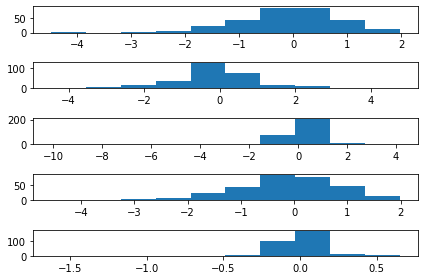

In [99]:
from matplotlib import pyplot
diff = y_test-y_pred

fig,axs = pyplot.subplots(
    5,
    1,
)
for i,ax in enumerate(axs):
    ax.hist(
    diff[:,i]
    )
pyplot.tight_layout()

# SimpleRNN

In [100]:
from tensorflow.keras.layers import SimpleRNN

model2 = Sequential()
model2.add(SimpleRNN(64, return_sequences = True, input_shape = (3,5)))
model2.add(SimpleRNN(32))
model2.add(Dense(5))
model2.compile(optimizer="adam", loss="mse", metrics=additional_metrics)
model2.build()
model2.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 3, 64)             4480      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 32)                3104      
                                                                 
 dense_12 (Dense)            (None, 5)                 165       
                                                                 
Total params: 7,749
Trainable params: 7,749
Non-trainable params: 0
_________________________________________________________________


In [101]:
history = model2.fit(
    x_train,
    y_train,
    epochs=1000,
    verbose=1
)

Epoch 1/1000
36/36 [==============================] - 2s 3ms/step - loss: 0.6617 - mae: 0.5367
Epoch 2/1000
36/36 [==============================] - 0s 3ms/step - loss: 0.4755 - mae: 0.4261
Epoch 3/1000
36/36 [==============================] - 0s 3ms/step - loss: 0.4505 - mae: 0.4098
Epoch 4/1000
36/36 [==============================] - 0s 3ms/step - loss: 0.4377 - mae: 0.4007
Epoch 5/1000
36/36 [==============================] - 0s 3ms/step - loss: 0.4289 - mae: 0.4015
Epoch 6/1000
36/36 [==============================] - 0s 3ms/step - loss: 0.4186 - mae: 0.3936
Epoch 7/1000
36/36 [==============================] - 0s 3ms/step - loss: 0.4118 - mae: 0.3882
Epoch 8/1000
36/36 [==============================] - 0s 3ms/step - loss: 0.4073 - mae: 0.3874
Epoch 9/1000
36/36 [==============================] - 0s 3ms/step - loss: 0.4024 - mae: 0.3838
Epoch 10/1000
36/36 [==============================] - 0s 3ms/step - loss: 0.3971 - mae: 0.3793
Epoch 11/1000
36/36 [============================

36/36 [==============================] - 0s 2ms/step - loss: 0.2769 - mae: 0.3349
Epoch 87/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.2733 - mae: 0.3336
Epoch 88/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.2764 - mae: 0.3358
Epoch 89/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.2690 - mae: 0.3319
Epoch 90/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.2778 - mae: 0.3390
Epoch 91/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.2700 - mae: 0.3318
Epoch 92/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.2715 - mae: 0.3322
Epoch 93/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.2726 - mae: 0.3339
Epoch 94/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.2682 - mae: 0.3306
Epoch 95/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.2671 - mae: 0.3282
Epoch 96/1000
36/36 [==============================] -

36/36 [==============================] - 0s 2ms/step - loss: 0.1868 - mae: 0.2851
Epoch 171/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1850 - mae: 0.2815
Epoch 172/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1855 - mae: 0.2843
Epoch 173/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1832 - mae: 0.2809
Epoch 174/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1802 - mae: 0.2789
Epoch 175/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1823 - mae: 0.2824
Epoch 176/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1789 - mae: 0.2782
Epoch 177/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1811 - mae: 0.2801
Epoch 178/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1803 - mae: 0.2815
Epoch 179/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1803 - mae: 0.2819
Epoch 180/1000
36/36 [=======================

36/36 [==============================] - 0s 3ms/step - loss: 0.1191 - mae: 0.2333
Epoch 255/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1187 - mae: 0.2326
Epoch 256/1000
36/36 [==============================] - 0s 3ms/step - loss: 0.1158 - mae: 0.2310
Epoch 257/1000
36/36 [==============================] - 0s 3ms/step - loss: 0.1126 - mae: 0.2267
Epoch 258/1000
36/36 [==============================] - 0s 3ms/step - loss: 0.1172 - mae: 0.2319
Epoch 259/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1147 - mae: 0.2289
Epoch 260/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1113 - mae: 0.2246
Epoch 261/1000
36/36 [==============================] - 0s 3ms/step - loss: 0.1103 - mae: 0.2260
Epoch 262/1000
36/36 [==============================] - 0s 3ms/step - loss: 0.1121 - mae: 0.2266
Epoch 263/1000
36/36 [==============================] - 0s 3ms/step - loss: 0.1108 - mae: 0.2239
Epoch 264/1000
36/36 [=======================

36/36 [==============================] - 0s 2ms/step - loss: 0.0706 - mae: 0.1821
Epoch 339/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0698 - mae: 0.1795
Epoch 340/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0708 - mae: 0.1837
Epoch 341/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0690 - mae: 0.1814
Epoch 342/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0674 - mae: 0.1783
Epoch 343/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0689 - mae: 0.1801
Epoch 344/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0681 - mae: 0.1786
Epoch 345/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0660 - mae: 0.1775
Epoch 346/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0683 - mae: 0.1806
Epoch 347/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0660 - mae: 0.1772
Epoch 348/1000
36/36 [=======================

36/36 [==============================] - 0s 2ms/step - loss: 0.0439 - mae: 0.1445
Epoch 423/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0436 - mae: 0.1448
Epoch 424/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0437 - mae: 0.1455
Epoch 425/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0460 - mae: 0.1492
Epoch 426/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0450 - mae: 0.1468
Epoch 427/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0437 - mae: 0.1454
Epoch 428/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0452 - mae: 0.1487
Epoch 429/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0432 - mae: 0.1441
Epoch 430/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0425 - mae: 0.1434
Epoch 431/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0441 - mae: 0.1457
Epoch 432/1000
36/36 [=======================

36/36 [==============================] - 0s 2ms/step - loss: 0.0309 - mae: 0.1220
Epoch 507/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0316 - mae: 0.1229
Epoch 508/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0312 - mae: 0.1223
Epoch 509/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0324 - mae: 0.1255
Epoch 510/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0337 - mae: 0.1292
Epoch 511/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0317 - mae: 0.1248
Epoch 512/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0296 - mae: 0.1186
Epoch 513/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0308 - mae: 0.1214
Epoch 514/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0308 - mae: 0.1227
Epoch 515/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0306 - mae: 0.1215
Epoch 516/1000
36/36 [=======================

36/36 [==============================] - 0s 2ms/step - loss: 0.0237 - mae: 0.1068
Epoch 591/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0235 - mae: 0.1056
Epoch 592/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0230 - mae: 0.1046
Epoch 593/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0220 - mae: 0.1013
Epoch 594/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0245 - mae: 0.1103
Epoch 595/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0244 - mae: 0.1085
Epoch 596/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0238 - mae: 0.1069
Epoch 597/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0249 - mae: 0.1114
Epoch 598/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0255 - mae: 0.1114
Epoch 599/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0250 - mae: 0.1104
Epoch 600/1000
36/36 [=======================

36/36 [==============================] - 0s 2ms/step - loss: 0.0198 - mae: 0.0964
Epoch 675/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0193 - mae: 0.0970
Epoch 676/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0191 - mae: 0.0953
Epoch 677/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0183 - mae: 0.0923
Epoch 678/1000
36/36 [==============================] - 0s 3ms/step - loss: 0.0190 - mae: 0.0944
Epoch 679/1000
36/36 [==============================] - 0s 3ms/step - loss: 0.0202 - mae: 0.0980
Epoch 680/1000
36/36 [==============================] - 0s 3ms/step - loss: 0.0204 - mae: 0.0998
Epoch 681/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0194 - mae: 0.0963
Epoch 682/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0194 - mae: 0.0958
Epoch 683/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0204 - mae: 0.0997
Epoch 684/1000
36/36 [=======================

36/36 [==============================] - 0s 2ms/step - loss: 0.0161 - mae: 0.0858
Epoch 759/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0152 - mae: 0.0833
Epoch 760/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0147 - mae: 0.0804
Epoch 761/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0155 - mae: 0.0853
Epoch 762/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0165 - mae: 0.0886
Epoch 763/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0161 - mae: 0.0872
Epoch 764/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0179 - mae: 0.0928
Epoch 765/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0179 - mae: 0.0925
Epoch 766/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0170 - mae: 0.0908
Epoch 767/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0170 - mae: 0.0907
Epoch 768/1000
36/36 [=======================

36/36 [==============================] - 0s 2ms/step - loss: 0.0133 - mae: 0.0788
Epoch 843/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0144 - mae: 0.0823
Epoch 844/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0144 - mae: 0.0830
Epoch 845/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0155 - mae: 0.0862
Epoch 846/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0145 - mae: 0.0838
Epoch 847/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0137 - mae: 0.0802
Epoch 848/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0140 - mae: 0.0819
Epoch 849/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0136 - mae: 0.0802
Epoch 850/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0139 - mae: 0.0817
Epoch 851/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0140 - mae: 0.0813
Epoch 852/1000
36/36 [=======================

36/36 [==============================] - 0s 2ms/step - loss: 0.0120 - mae: 0.0764
Epoch 927/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0119 - mae: 0.0756
Epoch 928/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0120 - mae: 0.0756
Epoch 929/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0114 - mae: 0.0730
Epoch 930/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0121 - mae: 0.0761
Epoch 931/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0133 - mae: 0.0810
Epoch 932/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0132 - mae: 0.0814
Epoch 933/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0129 - mae: 0.0799
Epoch 934/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0147 - mae: 0.0855
Epoch 935/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0141 - mae: 0.0845
Epoch 936/1000
36/36 [=======================

10/10 [==============================] - 0s 2ms/step


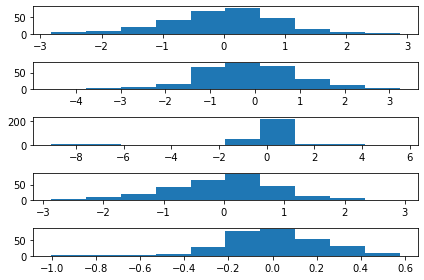

In [102]:
y_pred = model2.predict(
    x_test
)


diff = y_test - y_pred
fig,axs = pyplot.subplots(
    5,
    1,
)
for i,ax in enumerate(axs):
    ax.hist(
    diff[:,i]
    )
pyplot.tight_layout()

# GatedRNN

In [103]:
from tensorflow.keras.layers import GRU

model3 = Sequential()
model3.add(GRU(64, return_sequences = True, input_shape = (3,5)))
model3.add(GRU(32))
model3.add(Dense(5))
model3.compile(optimizer="adam", loss="mse", metrics=additional_metrics)
model3.build()
model3.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 3, 64)             13632     
                                                                 
 gru_3 (GRU)                 (None, 32)                9408      
                                                                 
 dense_13 (Dense)            (None, 5)                 165       
                                                                 
Total params: 23,205
Trainable params: 23,205
Non-trainable params: 0
_________________________________________________________________


In [104]:
history = model3.fit(
    x_train,
    y_train,
    epochs=1000,
    verbose=1
)

Epoch 1/1000
36/36 [==============================] - 4s 5ms/step - loss: 0.6539 - mae: 0.5332
Epoch 2/1000
36/36 [==============================] - 0s 5ms/step - loss: 0.4810 - mae: 0.4002
Epoch 3/1000
36/36 [==============================] - 0s 5ms/step - loss: 0.4635 - mae: 0.3913
Epoch 4/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.4513 - mae: 0.3859
Epoch 5/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.4392 - mae: 0.3826
Epoch 6/1000
36/36 [==============================] - 0s 5ms/step - loss: 0.4286 - mae: 0.3803
Epoch 7/1000
36/36 [==============================] - 0s 5ms/step - loss: 0.4181 - mae: 0.3806
Epoch 8/1000
36/36 [==============================] - 0s 5ms/step - loss: 0.4079 - mae: 0.3765
Epoch 9/1000
36/36 [==============================] - 0s 5ms/step - loss: 0.3984 - mae: 0.3719
Epoch 10/1000
36/36 [==============================] - 0s 5ms/step - loss: 0.3895 - mae: 0.3725
Epoch 11/1000
36/36 [============================

36/36 [==============================] - 0s 4ms/step - loss: 0.2801 - mae: 0.3182
Epoch 87/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.2802 - mae: 0.3195
Epoch 88/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.2774 - mae: 0.3164
Epoch 89/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.2775 - mae: 0.3208
Epoch 90/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.2780 - mae: 0.3199
Epoch 91/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.2756 - mae: 0.3163
Epoch 92/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.2751 - mae: 0.3160
Epoch 93/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.2742 - mae: 0.3166
Epoch 94/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.2726 - mae: 0.3164
Epoch 95/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.2693 - mae: 0.3117
Epoch 96/1000
36/36 [==============================] -

36/36 [==============================] - 0s 4ms/step - loss: 0.1491 - mae: 0.2509
Epoch 171/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.1487 - mae: 0.2500
Epoch 172/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.1441 - mae: 0.2466
Epoch 173/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.1440 - mae: 0.2464
Epoch 174/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.1417 - mae: 0.2456
Epoch 175/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.1420 - mae: 0.2467
Epoch 176/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.1389 - mae: 0.2440
Epoch 177/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.1394 - mae: 0.2440
Epoch 178/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.1357 - mae: 0.2428
Epoch 179/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.1332 - mae: 0.2394
Epoch 180/1000
36/36 [=======================

36/36 [==============================] - 0s 4ms/step - loss: 0.0445 - mae: 0.1421
Epoch 255/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0454 - mae: 0.1442
Epoch 256/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0440 - mae: 0.1418
Epoch 257/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0418 - mae: 0.1378
Epoch 258/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0413 - mae: 0.1382
Epoch 259/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0419 - mae: 0.1397
Epoch 260/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0400 - mae: 0.1345
Epoch 261/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0408 - mae: 0.1371
Epoch 262/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0395 - mae: 0.1340
Epoch 263/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0386 - mae: 0.1316
Epoch 264/1000
36/36 [=======================

36/36 [==============================] - 0s 4ms/step - loss: 0.0147 - mae: 0.0808
Epoch 339/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0138 - mae: 0.0787
Epoch 340/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0153 - mae: 0.0827
Epoch 341/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0139 - mae: 0.0796
Epoch 342/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0137 - mae: 0.0781
Epoch 343/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0132 - mae: 0.0765
Epoch 344/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0143 - mae: 0.0807
Epoch 345/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0152 - mae: 0.0848
Epoch 346/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0148 - mae: 0.0831
Epoch 347/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0129 - mae: 0.0762
Epoch 348/1000
36/36 [=======================

36/36 [==============================] - 0s 4ms/step - loss: 0.0079 - mae: 0.0599
Epoch 423/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0078 - mae: 0.0585
Epoch 424/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0079 - mae: 0.0596
Epoch 425/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0074 - mae: 0.0574
Epoch 426/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0076 - mae: 0.0578
Epoch 427/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0076 - mae: 0.0568
Epoch 428/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0077 - mae: 0.0582
Epoch 429/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0077 - mae: 0.0591
Epoch 430/1000
36/36 [==============================] - 0s 5ms/step - loss: 0.0072 - mae: 0.0570
Epoch 431/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0078 - mae: 0.0585
Epoch 432/1000
36/36 [=======================

36/36 [==============================] - 0s 4ms/step - loss: 0.0048 - mae: 0.0446
Epoch 507/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0047 - mae: 0.0436
Epoch 508/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0048 - mae: 0.0454
Epoch 509/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0045 - mae: 0.0429
Epoch 510/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0067 - mae: 0.0526
Epoch 511/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0064 - mae: 0.0527
Epoch 512/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0062 - mae: 0.0528
Epoch 513/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0064 - mae: 0.0528
Epoch 514/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0054 - mae: 0.0489
Epoch 515/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0055 - mae: 0.0483
Epoch 516/1000
36/36 [=======================

36/36 [==============================] - 0s 4ms/step - loss: 0.0032 - mae: 0.0361
Epoch 591/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0035 - mae: 0.0363
Epoch 592/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0034 - mae: 0.0365
Epoch 593/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0036 - mae: 0.0374
Epoch 594/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0039 - mae: 0.0394
Epoch 595/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0040 - mae: 0.0395
Epoch 596/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0038 - mae: 0.0392
Epoch 597/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0045 - mae: 0.0423
Epoch 598/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0041 - mae: 0.0425
Epoch 599/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0050 - mae: 0.0452
Epoch 600/1000
36/36 [=======================

36/36 [==============================] - 0s 4ms/step - loss: 0.0033 - mae: 0.0386
Epoch 675/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0036 - mae: 0.0384
Epoch 676/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0035 - mae: 0.0372
Epoch 677/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0037 - mae: 0.0390
Epoch 678/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0038 - mae: 0.0407
Epoch 679/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0044 - mae: 0.0433
Epoch 680/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0043 - mae: 0.0429
Epoch 681/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0041 - mae: 0.0424
Epoch 682/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0039 - mae: 0.0402
Epoch 683/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0049 - mae: 0.0451
Epoch 684/1000
36/36 [=======================

36/36 [==============================] - 0s 4ms/step - loss: 0.0033 - mae: 0.0388
Epoch 759/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0042 - mae: 0.0414
Epoch 760/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0049 - mae: 0.0453
Epoch 761/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0041 - mae: 0.0417
Epoch 762/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0034 - mae: 0.0386
Epoch 763/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0030 - mae: 0.0363
Epoch 764/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0029 - mae: 0.0364
Epoch 765/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0040 - mae: 0.0396
Epoch 766/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0047 - mae: 0.0442
Epoch 767/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0040 - mae: 0.0434
Epoch 768/1000
36/36 [=======================

36/36 [==============================] - 0s 4ms/step - loss: 0.0036 - mae: 0.0414
Epoch 843/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0034 - mae: 0.0386
Epoch 844/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0031 - mae: 0.0361
Epoch 845/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0029 - mae: 0.0353
Epoch 846/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0044 - mae: 0.0394
Epoch 847/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0045 - mae: 0.0437
Epoch 848/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0045 - mae: 0.0435
Epoch 849/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0034 - mae: 0.0400
Epoch 850/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0033 - mae: 0.0382
Epoch 851/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0038 - mae: 0.0402
Epoch 852/1000
36/36 [=======================

36/36 [==============================] - 0s 4ms/step - loss: 0.0018 - mae: 0.0300
Epoch 927/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0014 - mae: 0.0269
Epoch 928/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0012 - mae: 0.0251
Epoch 929/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0015 - mae: 0.0263
Epoch 930/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0015 - mae: 0.0262
Epoch 931/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0016 - mae: 0.0277
Epoch 932/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0018 - mae: 0.0306
Epoch 933/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0019 - mae: 0.0311
Epoch 934/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0022 - mae: 0.0330
Epoch 935/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0022 - mae: 0.0331
Epoch 936/1000
36/36 [=======================

10/10 [==============================] - 1s 2ms/step


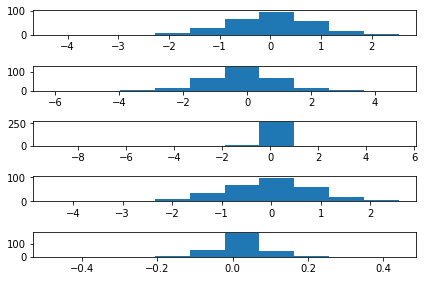

In [105]:
y_pred = model3.predict(
    x_test
)


diff = y_test - y_pred
fig,axs = pyplot.subplots(
    5,
    1,
)
for i,ax in enumerate(axs):
    ax.hist(
    diff[:,i]
    )
pyplot.tight_layout()